<a href="https://colab.research.google.com/github/EvieLynn26/Computational-Mathematics/blob/main/practice4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Метод Ньютона -- это итерационный численный метод нахождения корня заданной функции.
Поиск решения осуществляется путём построения последовательных приближений. Метод обладает квадратичной сходимостью, однако, глобальная сходимость метода Ньютона, вообще говоря, не гарантируется. Для сходимости имеет значение начальная точка $x_0$.

Обозначим корень уравнения за $x^*: f(x^*) = 0$ и применим формулу Тейлора: $f(x^*) ≃ f(x_0) + f'(x_0)(x^* - x_0)$. Выразим $x^*$: $x^* ≃ x_0 - \frac{f(x_0)}{f'(x_0)}$. Будем рекурсивно вычислять решение $x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)}$, пока не достигнем нужной точности $|x_{n + 1} - x_n| < ε$ или другого условия, например, $|f(x_n)| < ε$ или верхней границы на кол-во итераций.



In [3]:
def newton(f, df, x0, tol=1e-6, maxiter=100):
    x = x0
    iterations = 0  # Счетчик количества итераций
    while True:
        fx = f(x)
        if abs(fx) < tol:
            return x, iterations
        dfx = df(x)
        if dfx == 0:
            break
        x = x - fx / dfx
        iterations += 1
        if iterations >= maxiter:
            break
    return None, iterations

Применим метод Ньютона для нахождения корней уравнений и сравним число итераций из теоретической оценки с реальным числом итераций.

Важно правильно выбрать начальную точку -- близкую к искомому корню уравнения. Построим график функции лвевой части уравнения.

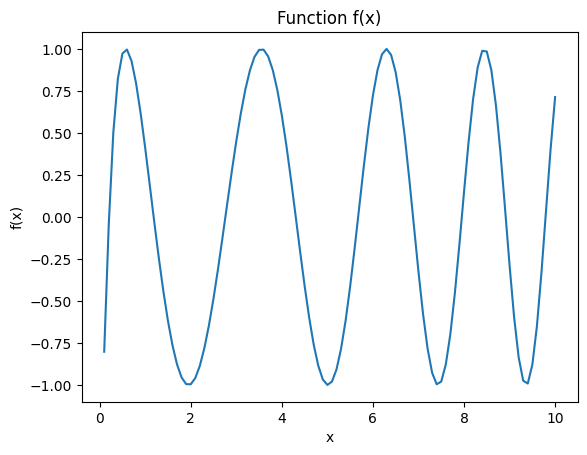

In [11]:
import math
import numpy as np

def f(x):
    return np.sin(np.exp(np.sqrt(x)) + np.log(x))

x = np.linspace(0.1, 10, 100) 

y = f(x) 

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function f(x)')
plt.show()

In [9]:
import math
import numpy as np

def f(x):
    return math.sin(math.exp(math.sqrt(x)) + math.log(x))

def df(x):
    return math.cos(math.exp(math.sqrt(x)) + math.log(x)) * (math.exp(math.sqrt(x)) / (2 * math.sqrt(x))) + 1/x
    

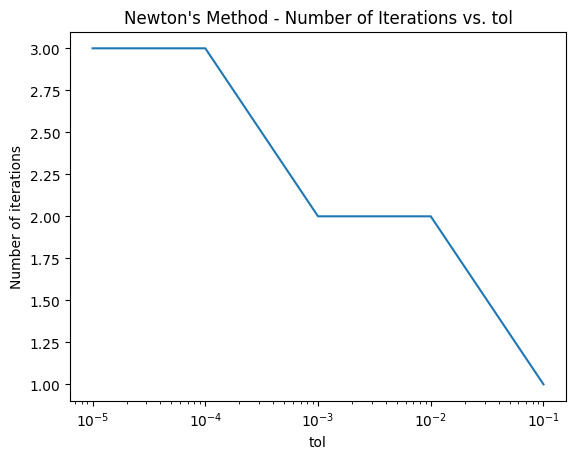

In [12]:
x0 = 1.0  # Начальное приближение
tol_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]  # Значения tol

iterations_list = []  # Список для сохранения количества итераций

for tol in tol_values:
    root, iterations = newton(f, df, x0, tol)
    iterations_list.append(iterations)

# Построение графика количества итераций от tol
plt.plot(tol_values, iterations_list)
plt.xlabel('tol')
plt.ylabel('Number of iterations')
plt.title('Newton\'s Method - Number of Iterations vs. tol')
plt.xscale('log')  # Логарифмическая шкала по оси x для лучшей визуализации значений tol
plt.show()